In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rnd
import yfinance as yf
from deap import algorithms, base, creator, tools

import warnings
warnings.filterwarnings("ignore")

In [64]:
activos = ['AAPL', 'TSLA', 'F', 'GE']
fecha_inicio = '2021-01-01'
fecha_final = '2024-03-31'

datos = yf.download(activos, start=fecha_inicio, end=fecha_final)
datos = pd.DataFrame((datos[["Adj Close", "Open"]]))
datos

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                           Open         \
Ticker            AAPL          F          GE        TSLA        AAPL      F   
Date                                                                           
2021-01-04  127.002083   7.234354   51.412861  243.256668  133.520004   8.81   
2021-01-05  128.572342   7.344736   52.886009  245.036667  128.889999   8.47   
2021-01-06  124.244385   7.506064   55.783199  251.993332  127.720001   8.79   
2021-01-07  128.484009   7.692868   55.341255  272.013336  128.360001   8.94   
2021-01-08  129.593002   7.641922   55.684990  293.339996  132.429993   9.10   
...                ...        ...         ...         ...         ...    ...   
2024-03-22  172.279999  12.910000  139.536301  170.830002  171.759995  12.87   
2024-03-25  170.850006  12.900000  138.213837  172.630005  170.570007  12.92   
2024-03-26  169.710007  12.440000  138.261627  177.669998  170.000000  12.96   
2024-03-27  173.309998  13.060000  143.495728  179.830002  170.410004  12.53   
2024-03-28  171.479996  13.280000  139.839020  175.789993  171.750000  13.07   

Price                               
Ticker              GE        TSLA  
Date                                
2021-01-04   54.277229  239.820007  
2021-01-05   51.984528  241.220001  
2021-01-06   53.978180  252.830002  
2021-01-07   57.616600  259.209991  
2021-01-08   56.270882  285.333344  
...                ...         ...  
2024-03-22  140.702316  166.690002  
2024-03-25  139.393463  168.759995  
2024-03-26  138.459702  178.580002  
2024-03-27  139.680771  181.410004  
2024-03-28  143.615326  177.449997  

[814 rows x 8 columns]

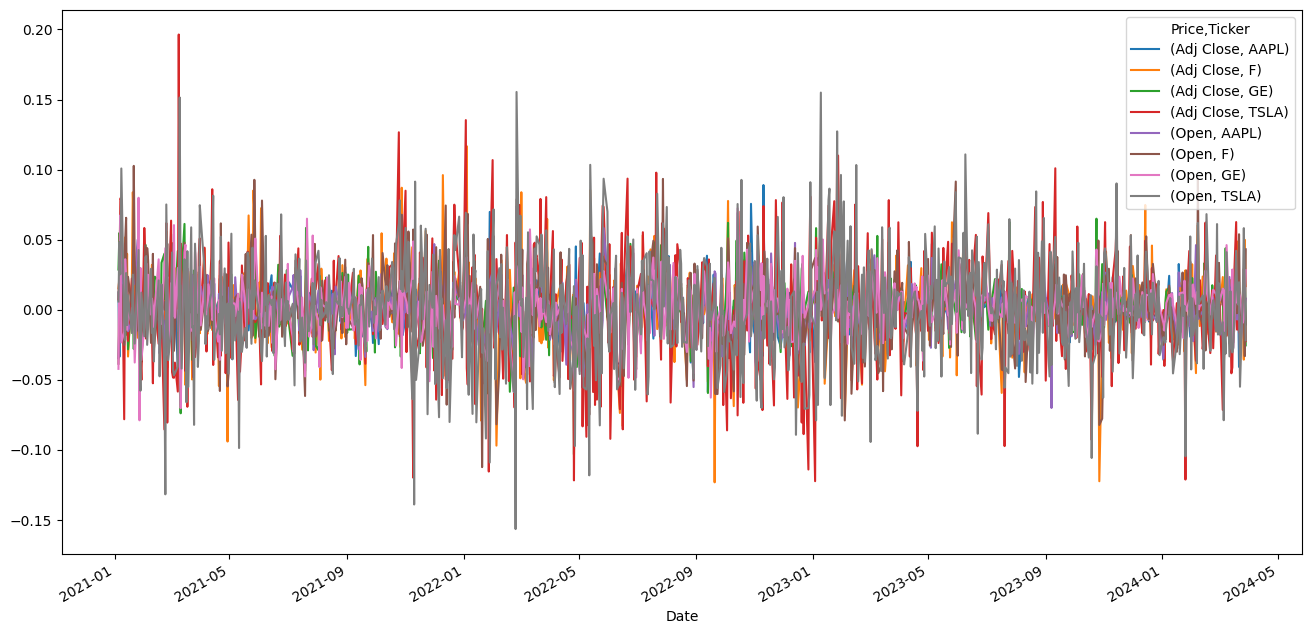

Price      Adj Close                                    Open            \
Ticker          AAPL         F        GE      TSLA      AAPL         F   
Date                                                                     
2021-01-05  0.012364  0.015258  0.028653  0.007317 -0.034676 -0.038593   
2021-01-06 -0.033662  0.021965  0.054782  0.028390 -0.009077  0.037780   
2021-01-07  0.034123  0.024887 -0.007923  0.079447  0.005011  0.017065   
2021-01-08  0.008631 -0.006623  0.006211  0.078403  0.031708  0.017897   
2021-01-11 -0.023249  0.033333  0.009700 -0.078214 -0.024466 -0.025275   
...              ...       ...       ...       ...       ...       ...   
2024-03-22  0.005310 -0.000774 -0.008435 -0.011515 -0.029879 -0.003870   
2024-03-25 -0.008300 -0.000775 -0.009478  0.010537 -0.006928  0.003885   
2024-03-26 -0.006673 -0.035659  0.000346  0.029195 -0.003342  0.003096   
2024-03-27  0.021213  0.049839  0.037856  0.012157  0.002412 -0.033179   
2024-03-28 -0.010559  0.016845 -0.025483 -0.022466  0.007863  0.043097   

Price                           
Ticker            GE      TSLA  
Date                            
2021-01-05 -0.042241  0.005838  
2021-01-06  0.038351  0.048130  
2021-01-07  0.067405  0.025234  
2021-01-08 -0.023356  0.100781  
2021-01-11 -0.015943 -0.007710  
...              ...       ...  
2024-03-22  0.009621 -0.054992  
2024-03-25 -0.009302  0.012418  
2024-03-26 -0.006699  0.058189  
2024-03-27  0.008819  0.015847  
2024-03-28  0.028168 -0.021829  

[813 rows x 8 columns]

In [65]:
retorno_simple = datos.pct_change().dropna()
retorno_simple.plot(figsize = (16, 8))
plt.show()
retorno_simple

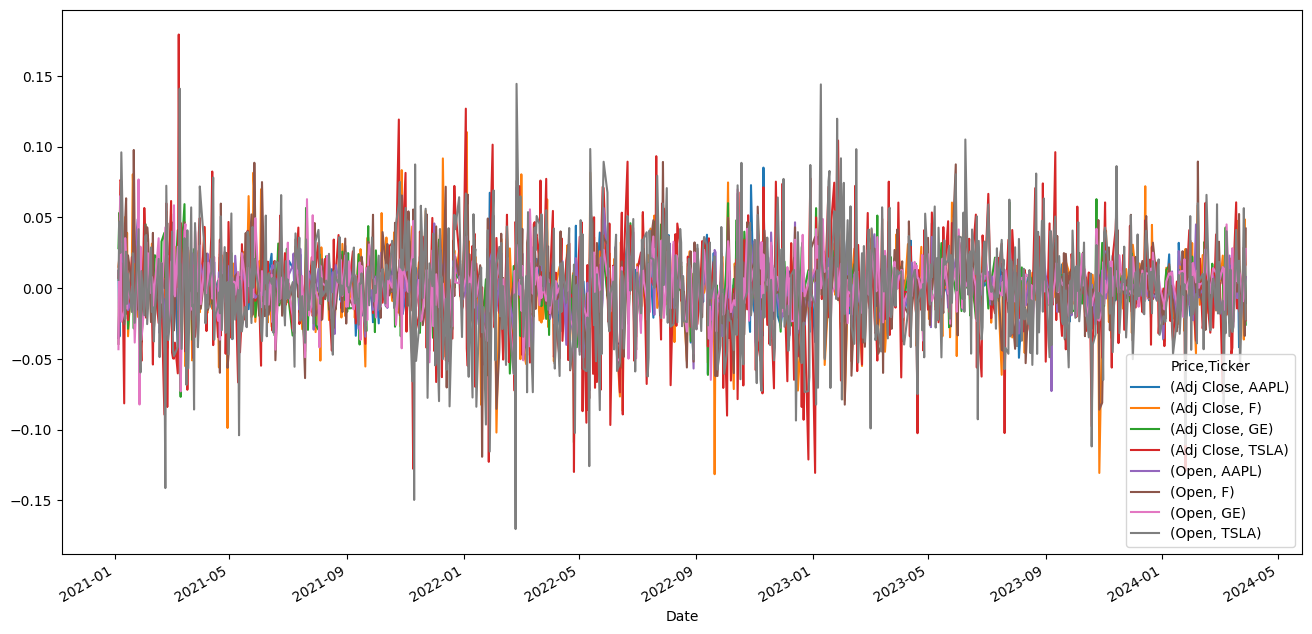

Price      Adj Close                                    Open            \
Ticker          AAPL         F        GE      TSLA      AAPL         F   
Date                                                                     
2021-01-05  0.012288  0.015143  0.028250  0.007291 -0.035292 -0.039357   
2021-01-06 -0.034241  0.021727  0.053334  0.027995 -0.009119  0.037084   
2021-01-07  0.033554  0.024582 -0.007954  0.076448  0.004998  0.016921   
2021-01-08  0.008594 -0.006645  0.006192  0.075481  0.031215  0.017739   
2021-01-11 -0.023524  0.032790  0.009653 -0.081442 -0.024770 -0.025600   
...              ...       ...       ...       ...       ...       ...   
2024-03-22  0.005296 -0.000774 -0.008471 -0.011582 -0.030334 -0.003877   
2024-03-25 -0.008335 -0.000775 -0.009523  0.010482 -0.006952  0.003877   
2024-03-26 -0.006695 -0.036310  0.000346  0.028777 -0.003347  0.003091   
2024-03-27  0.020991  0.048637  0.037158  0.012084  0.002409 -0.033742   
2024-03-28 -0.010615  0.016705 -0.025813 -0.022722  0.007833  0.042194   

Price                           
Ticker            GE      TSLA  
Date                            
2021-01-05 -0.043159  0.005821  
2021-01-06  0.037634  0.047008  
2021-01-07  0.065231  0.024921  
2021-01-08 -0.023634  0.096020  
2021-01-11 -0.016072 -0.007740  
...              ...       ...  
2024-03-22  0.009575 -0.056562  
2024-03-25 -0.009346  0.012342  
2024-03-26 -0.006721  0.056559  
2024-03-27  0.008780  0.015723  
2024-03-28  0.027779 -0.022071  

[813 rows x 8 columns]

In [66]:
retorno_logaritmico = np.log(datos/datos.shift(1)).dropna()
retorno_logaritmico.plot(figsize = (16, 8))
plt.show()
retorno_logaritmico

In [67]:
def adaptabilidad(individual):
    pass

# Contenedores

In [68]:
# Contenedor
toolbox = base.Toolbox()

# Declarar clase función de adaptabilidad
creator.create("FitnessMulti", base.Fitness, weights = (1.0,-1.0))

# Crear la clase individuo
creator.create("Individual", list, fitness = creator.FitnessMulti)

In [69]:
# Construir cromosomas bit
toolbox.register("attr_portafolio", rnd.randint, 100, 450)

# Construir el individuo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_portafolio, n = len(activos))

#Crear población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [70]:
individuo = toolbox.individual()
print(individuo)

poblacion = toolbox.population(n = 5)
print(poblacion)

[111, 138, 151, 376]
[[207, 210, 231, 443], [326, 296, 252, 312], [223, 133, 419, 156], [429, 252, 275, 278], [115, 183, 231, 443]]


In [71]:
toolbox.register("select", tools.selRoulette)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=150, sigma = 20, indpb=0.2)
toolbox.register("evaluate", adaptabilidad)